In [93]:
import json

In [94]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [95]:
def dt_str(dt): return str(dt).split('.')[1]

In [96]:
basedir = "./direc56/"

In [97]:
with open(f"{basedir}/state_params.json", "r") as f:
    state_params = json.load(f)

In [98]:
state_params

{'J': 1.0,
 'hx': 1.0144727,
 'hz': 0.001,
 'J2': 0.0,
 'J3': 0.0,
 'J4': 0.0,
 'J5': 0.0,
 'hzx': 0.0,
 'D': 40,
 'vac_tol': 1e-10,
 'N': 1200,
 'ortho_2p': True,
 'symmB': False,
 'pkt_numsites': 590,
 'pkt_sigma': 100,
 'pkt_midpt': 295,
 'pad_mid': 0,
 'pad_out': 0,
 'momentum': 0.05844,
 'ex_lvl': 0}

## Plot dispersion from `save_spec`
Requires that `python master.py save_spec` has been run in `basedir`.

In [99]:
Es = np.load(f"{basedir}/vac_out_scalar_spec.npy")
ps = np.load(f"{basedir}/vac_out_scalar_spec_ps.npy")
foo = np.load(f"{basedir}/state_info.npy")
print("Correlation length =", np.round(foo[2],4)) 

Correlation length = (18.0634+0j)


In [100]:
# works after `python master.py prep_pkts` has run
E_psi = np.sum(np.load(f"{basedir}/initial_state_es.npy"))
E_psi/Es[0][0] # Need to be 3 for tests now. 
E_needed = Es[0][0]*1.50 
#print (E_needed, E_psi/Es[0][0])

Mom needed 0.08055365778435367 for energy 0.19377246984971946
[array([0.        , 0.08055366, 0.16110732, 0.24166097, 0.32221463,
       0.40276829, 0.48332195, 0.5638756 , 0.64442926, 0.72498292,
       0.80553658, 0.88609024, 0.96664389, 1.04719755, 1.12775121,
       1.20830487, 1.28885852, 1.36941218, 1.44996584, 1.5305195 ,
       1.61107316, 1.69162681, 1.77218047, 1.85273413, 1.93328779,
       2.01384144, 2.0943951 , 2.17494876, 2.25550242, 2.33605608,
       2.41660973, 2.49716339, 2.57771705, 2.65827071, 2.73882436,
       2.81937802, 2.89993168, 2.98048534, 3.061039  , 3.14159265])]


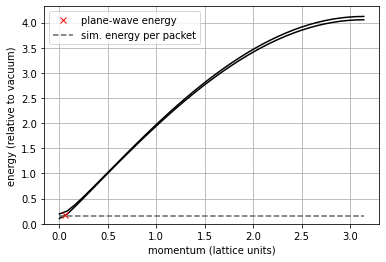

In [101]:
plt.plot(ps, Es[:, 0], "k")
plt.plot(ps, Es[:, 1], "k")

p = state_params["momentum"]
E = np.interp(p, ps, Es[:, state_params["ex_lvl"]])
#print (Es[:,0], ps)

for i in range (10):
    diff = Es[i,0]- E_needed 
    if abs(diff) < 0.04:
        print ("Mom needed", ps[i], "for energy", Es[i,0])
    
print ([ps])
plt.plot([p], [E], "rx", label="plane-wave energy")


plt.plot([ps[0], ps[-1]], [E_psi/2] * 2, "--", color="0.4", label="sim. energy per packet")
#print ([E_psi/2])

plt.xlabel("momentum (lattice units)")
plt.ylabel("energy (relative to vacuum)")
plt.ylim(ymin=0)
plt.legend()
plt.grid()

## Load a simulation

In [102]:
Dmax = 64
dt = 0.05
integrator = "RK4"

In [103]:
simdir = f"{basedir}/maxD{Dmax}_dt{dt_str(dt)}{integrator}/"
simdir

'./direc56//maxD64_dt05RK4/'

## Spin expectation values

In [104]:
# saved for every time step, including 0.
spins = np.load(f"{simdir}/expvals_evo.npy")

In [105]:
spins.shape

(9301, 1202)

In [106]:
# the last time stored
(len(spins) - 1) * dt

465.0

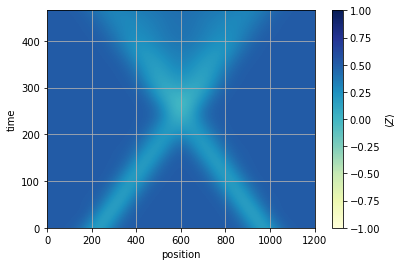

In [107]:
plt.imshow(
    spins,
    cmap="YlGnBu", #  # RdBu
    vmin=-1, vmax=1,
    origin='lower',
    aspect='auto',
    #interpolation='nearest',
    extent=(-0.5, len(spins[0])-0.5, -dt/2, dt * (len(spins) - 0.5))  # labels point to middle of pixels
)
plt.grid()
plt.xlabel("position")
plt.ylabel("time")
plt.colorbar(label="$\\langle Z \\rangle$")
# Change cmap options: https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html


<ipython-input-108-47a21f1d34e6>:2: RuntimeWarning: divide by zero encountered in log10
  np.log10(abs(spins - spins[0,0])),


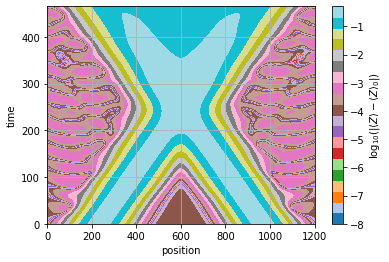

In [108]:
plt.imshow(
    np.log10(abs(spins - spins[0,0])),
    cmap="tab20",
    vmin=-8,
    origin='lower',
    aspect='auto',
    #interpolation='nearest',
    extent=(-0.5, len(spins[0])-0.5, -dt/2, dt * (len(spins) - 0.5))  # labels point to middle of pixels
)
plt.grid()
plt.xlabel("position")
plt.ylabel("time")
plt.colorbar(label="$\\log_{10}(|\\langle Z \\rangle - \\langle Z \\rangle_0|)$")

## Cut entropy

In [109]:
# As spins
entrs = np.load(f"{simdir}/entropies_evo.npy")
entrs.shape

(9301, 1202)

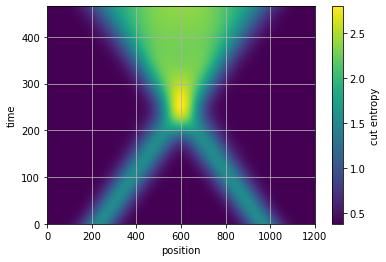

In [110]:
plt.imshow(
    entrs,
    cmap="viridis",
    origin='lower',
    aspect='auto',
    #interpolation='nearest',
    extent=(-1, len(entrs[0])-1, -dt/2, dt * (len(entrs) - 0.5))  # labels point to middle of pixels
)
plt.grid()
plt.xlabel("position")
plt.ylabel("time")
plt.colorbar(label="cut entropy")

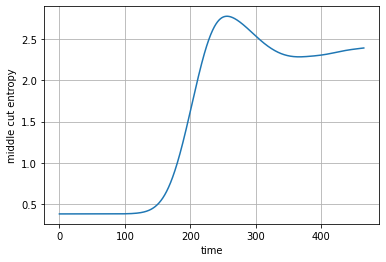

In [111]:
plt.plot(dt * np.arange(len(entrs)), entrs[:, state_params["pkt_numsites"]])
plt.xlabel("time")
plt.ylabel("middle cut entropy")
plt.grid()

## Energy density

In [112]:
# As spins
energies = np.load(f"{simdir}/energies_evo.npy")
energies.shape

(9301, 1202)

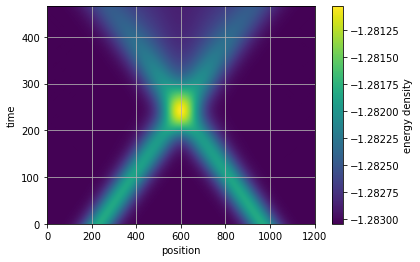

In [113]:
plt.imshow(
    energies,
    cmap="viridis",
    origin='lower',
    aspect='auto',
    #interpolation='nearest',
    extent=(-0.5, len(entrs[0])-0.5, -dt/2, dt * (len(entrs) - 0.5))  # labels point to middle of pixels
)
plt.grid()
plt.xlabel("position")
plt.ylabel("time")
plt.colorbar(label="energy density")

## Energy current

In [114]:
# As spins
encurrs = np.load(f"{simdir}/encurrs_evo.npy")
encurrs.shape

(9301, 1202)

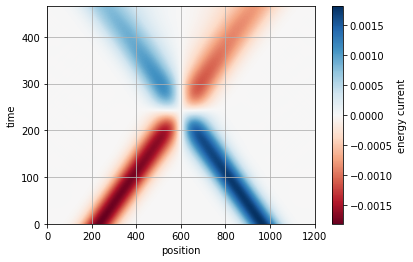

In [115]:
plt.imshow(
    encurrs,
    cmap="RdBu",
    origin='lower',
    aspect='auto',
    #interpolation='nearest',
    extent=(-0.5, len(entrs[0])-0.5, -dt/2, dt * (len(entrs) - 0.5))  # labels point to middle of pixels
)
plt.grid()
plt.xlabel("position")
plt.ylabel("time")
plt.colorbar(label="energy current")